In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_data = pd.read_csv('../data/train_final2.csv')
train_data = train_data.drop(columns = ['Genre', 'actors', 'director', 'companies', 'overview', 'top_actors'])
X_train = train_data.drop(columns=['IMDB Score'])

In [3]:
test_data = pd.read_csv('../data/test_final2.csv')
test_data = test_data.drop(columns = ['Genre', 'actors', 'director', 'companies', 'overview', 'top_actors'])
X_test = test_data.drop(columns=['IMDB Score'])

In [4]:
X_train.head()

,runtime,budget,comedy,romance,drama,musical,adventure,western,sport,action,...,Mike,Jewish,author,hit,order,go,book,murders,teenage,decide
0,97.0,27000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,99.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,107.0,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,95.0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110.0,10000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Linear regression

In [5]:
linearRegression = LinearRegression().fit(X_train, train_data['IMDB Score'])

In [6]:
print('train R^2: ', linearRegression.score(X_train, train_data['IMDB Score']))
print('test R^2: ', linearRegression.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(linearRegression.predict(X_train), train_data['IMDB Score']))
print('train MAE: ', mean_absolute_error(linearRegression.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(linearRegression.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(linearRegression.predict(X_test), test_data['IMDB Score']))

train R^2:  0.6975373878682696
test R^2:  -0.08361906453769419
train MAE:  0.4414965886950981
train MAE:  0.8171506801963895
train MSE:  0.325694684152396
test MSE:  1.0701402184640283


We will run GridSearchCV to see what are the best params for this regression

In [7]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}
linearModel = GridSearchCV(estimator=LinearRegression(), param_grid=parameters, scoring='r2', cv=5).fit(X_train, train_data['IMDB Score'])

In [8]:
print("best estimator: ", linearModel.best_estimator_)
print("best params: ", linearModel.best_params_)
print("best score: ", linearModel.best_score_)

best estimator:  LinearRegression()
best params:  {'fit_intercept': True, 'normalize': False}
best score:  -0.7074227723250006


In [9]:
linearRegressionGrid = LinearRegression(fit_intercept= True, normalize=False).fit(X_train, train_data['IMDB Score'])
print('train R^2: ', linearRegressionGrid.score(X_train, train_data['IMDB Score']))
print('test R^2: ', linearRegressionGrid.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(linearRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(linearRegressionGrid.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(linearRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(linearRegressionGrid.predict(X_test), test_data['IMDB Score']))

train R^2:  0.6975373878682696
test R^2:  -0.08361906453769419
train MAE:  0.4414965886950981
test MAE:  0.8171506801963895
train MSE:  0.325694684152396
test MSE:  1.0701402184640283


# Ridge regression

In [10]:
ridgeRegression = Ridge(alpha=10, normalize=True, random_state=0).fit(X_train, train_data['IMDB Score'])

print('Train R^2: ', ridgeRegression.score(X_train, train_data['IMDB Score']))
print('Test R^2: ', ridgeRegression.score(X_test, test_data['IMDB Score']))

print('Train MAE: ', mean_absolute_error(ridgeRegression.predict(X_train), train_data['IMDB Score']))
print('Test MAE: ', mean_absolute_error(ridgeRegression.predict(X_test), test_data['IMDB Score']))

print('Train MSE: ', mean_squared_error(ridgeRegression.predict(X_train), train_data['IMDB Score']))
print('Test MSE: ', mean_squared_error(ridgeRegression.predict(X_test), test_data['IMDB Score']))

Train R^2:  0.19174609984964475
Test R^2:  0.12165415806380964
Train MAE:  0.7217692891909088
Test MAE:  0.7268126983311105
Train MSE:  0.8703356651888018
Test MSE:  0.8674203342644023


We will run GridSearchCV to see what are the best params for this regression

In [ ]:
parameters = {'alpha':[1,5,10,30], 'fit_intercept':[True,False], 'normalize':[True]}
ridgeModel = GridSearchCV(estimator=Ridge(), param_grid=parameters, scoring='r2', cv=5, error_score='raise').fit(X_train, train_data['IMDB Score'])

In [12]:
print(ridgeModel.best_estimator_)
print(ridgeModel.best_params_)
print(ridgeModel.best_score_)

Ridge(alpha=1, normalize=True)
{'alpha': 1, 'fit_intercept': True, 'normalize': True}
0.2780498677329833


In [13]:
ridgeRegressionGrid = Ridge(alpha=1, fit_intercept=True, normalize=True, random_state=0).fit(X_train, train_data['IMDB Score'])

print('Train R^2: ', ridgeRegressionGrid.score(X_train, train_data['IMDB Score']))
print('Test R^2: ', ridgeRegressionGrid.score(X_test, test_data['IMDB Score']))

print('Train MAE: ', mean_absolute_error(ridgeRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('Test MAE: ', mean_absolute_error(ridgeRegressionGrid.predict(X_test), test_data['IMDB Score']))

print('Train MSE: ', mean_squared_error(ridgeRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('Test MSE: ', mean_squared_error(ridgeRegressionGrid.predict(X_test), test_data['IMDB Score']))

Train R^2:  0.5430554470969404
Test R^2:  0.2672915613818133
Train MAE:  0.5358217404979934
Test MAE:  0.6653916126978011
Train MSE:  0.4920423413129251
Test MSE:  0.7235944754329561


# Lasso (Least Absolute Shrinkage and Selection Operator)

In [14]:
lassoRegression = Lasso(alpha=0.01, random_state=0).fit(X_train, train_data['IMDB Score'])

In [15]:
print('train R^2: ', lassoRegression.score(X_train, train_data['IMDB Score']))
print('test R^2: ', lassoRegression.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(lassoRegression.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(lassoRegression.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(lassoRegression.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(lassoRegression.predict(X_test), test_data['IMDB Score']))

train R^2:  0.22539566709947767
test R^2:  0.23082228287647877
train MAE:  0.7071151600038588
test MAE:  0.6769756376029746
train MSE:  0.8341014837140812
test MSE:  0.7596101223924109


We will run GridSearchCV to see what are the best params for this regression

In [16]:
parameters = {'alpha':[0.1, 0.01, 0.5], 'fit_intercept':[True,False], 'normalize':[True,False], 'selection':['cyclic', 'random']}
lassoModel = GridSearchCV(estimator=Lasso(), param_grid=parameters, scoring='r2', cv=5, error_score="raise").fit(X_train, train_data['IMDB Score'])

In [17]:
print(lassoModel.best_estimator_)
print(lassoModel.best_params_)
print(lassoModel.best_score_)

Lasso(alpha=0.01)
{'alpha': 0.01, 'fit_intercept': True, 'normalize': False, 'selection': 'cyclic'}
0.21465548087053926


In [18]:
lassoRegressionGrid = Lasso(alpha=0.01, normalize=False, selection='random', fit_intercept=True).fit(X_train, train_data['IMDB Score'])

print('train R^2: ', lassoRegressionGrid.score(X_train, train_data['IMDB Score']))
print('test R^2: ', lassoRegressionGrid.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(lassoRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(lassoRegressionGrid.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(lassoRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(lassoRegressionGrid.predict(X_test), test_data['IMDB Score']))

train R^2:  0.22539573268084834
test R^2:  0.23082254532769575
train MAE:  0.7071151378272379
test MAE:  0.6769755512369168
train MSE:  0.8341014130954231
test MSE:  0.759609863205754


# Random Forest

In [19]:
RandomForestReg = RandomForestRegressor(n_estimators=100, max_depth=32).fit(X_train, train_data['IMDB Score'])

In [20]:
print('train R^2: ', RandomForestReg.score(X_train, train_data['IMDB Score']))
print('test R^2: ', RandomForestReg.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(RandomForestReg.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(RandomForestReg.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(RandomForestReg.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(RandomForestReg.predict(X_test), test_data['IMDB Score']))

train R^2:  0.8434910739949135
test R^2:  0.3480215435800472
train MAE:  0.3320578907345683
test MAE:  0.6226180725231611
train MSE:  0.16853033458580594
test MSE:  0.6438686717686649


We will run GridSearchCV to see what are the best params for this regression

In [21]:
parameters = {'n_estimators':[100, 200], 'max_depth':[16, 32], 'min_samples_leaf': [2, 3]}
randomForestModel = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, scoring='neg_mean_squared_error', cv=5, error_score="raise").fit(X_train, train_data['IMDB Score'])

In [22]:
print(randomForestModel.best_estimator_)
print(randomForestModel.best_params_)
print(randomForestModel.best_score_)

RandomForestRegressor(max_depth=32, min_samples_leaf=2, n_estimators=200)
{'max_depth': 32, 'min_samples_leaf': 2, 'n_estimators': 200}
-0.7147343437232236


In [23]:
randomForestGrid = RandomForestRegressor(n_estimators=200, max_depth=32, min_samples_leaf=2).fit(X_train, train_data['IMDB Score'])

print('train R^2: ', randomForestGrid.score(X_train, train_data['IMDB Score']))
print('test R^2: ', randomForestGrid.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(randomForestGrid.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(randomForestGrid.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(randomForestGrid.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(randomForestGrid.predict(X_test), test_data['IMDB Score']))

train R^2:  0.8009346997946554
test R^2:  0.3539044331379487
train MAE:  0.3513765027062088
test MAE:  0.620081784177849
train MSE:  0.21435545246116064
test MSE:  0.6380589578916038


Index(['runtime', 'budget', 'action', 'drama', 'documentary', 'horror',
       'animation', 'woody allen', 'crime', 'comedy', 'sci-fi',
       'pixar animation studios', 'danny trejo', 'adventure', ''s', 'romance',
       'A', 'new', 'live', 'thriller'],
      dtype='object')


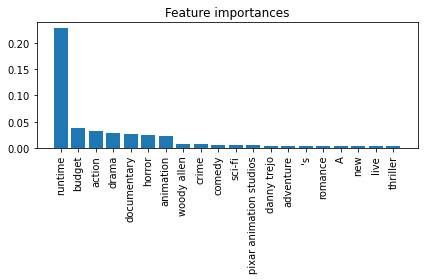

In [24]:
featureImportances = np.argsort(RandomForestReg.feature_importances_)[::-1]
print(X_train.columns[featureImportances[:20]])
plt.figure()
plt.title("Feature importances")
plt.bar(range(20),RandomForestReg.feature_importances_[featureImportances[:20]])
plt.xticks(range(20), X_train.columns[featureImportances[:20]], rotation='vertical')
plt.tight_layout()
plt.savefig('../data/randomforest.png')
plt.show()

# XGBoost (eXtreme Gradient Boosting)

In [25]:
xgbRegression = xgb.XGBRegressor(objective='reg:squarederror').fit(X_train, train_data['IMDB Score'])

In [26]:
print('train R^2: ', xgbRegression.score(X_train, train_data['IMDB Score']))
print('test R^2: ', xgbRegression.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(xgbRegression.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(xgbRegression.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(xgbRegression.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(xgbRegression.predict(X_test), test_data['IMDB Score']))

train R^2:  0.7356594644033094
test R^2:  0.35436000629533615
train MAE:  0.40847821777075716
test MAE:  0.6213208720406557
train MSE:  0.2846444611552286
test MSE:  0.6376090514861819


# Plotting errors for different models

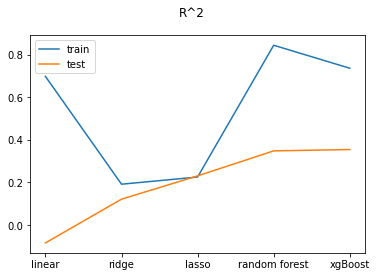

In [30]:
r2_train_errors = [linearRegression.score(X_train, train_data['IMDB Score']), ridgeRegression.score(X_train, train_data['IMDB Score']), lassoRegression.score(X_train, train_data['IMDB Score']), RandomForestReg.score(X_train, train_data['IMDB Score']), xgbRegression.score(X_train, train_data['IMDB Score'])]
r2_test_errors = [linearRegression.score(X_test, test_data['IMDB Score']), ridgeRegression.score(X_test, test_data['IMDB Score']), lassoRegression.score(X_test, test_data['IMDB Score']), RandomForestReg.score(X_test, test_data['IMDB Score']), xgbRegression.score(X_test, test_data['IMDB Score'])]
models = ['linear','ridge', 'lasso', 'random forest', 'xgBoost']

plt.suptitle('R^2')
plt.plot(models, r2_train_errors)
plt.plot(models, r2_test_errors)
plt.legend(labels=['train', 'test'])
plt.show()

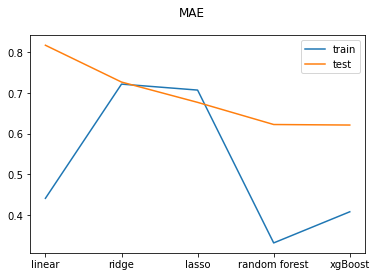

In [29]:
mae_train_errors = [mean_absolute_error(linearRegression.predict(X_train), train_data['IMDB Score']), mean_absolute_error(ridgeRegression.predict(X_train), train_data['IMDB Score']), mean_absolute_error(lassoRegression.predict(X_train), train_data['IMDB Score']), mean_absolute_error(RandomForestReg.predict(X_train), train_data['IMDB Score']), mean_absolute_error(xgbRegression.predict(X_train), train_data['IMDB Score'])]
mae_test_errors = [mean_absolute_error(linearRegression.predict(X_test), test_data['IMDB Score']), mean_absolute_error(ridgeRegression.predict(X_test), test_data['IMDB Score']), mean_absolute_error(lassoRegression.predict(X_test), test_data['IMDB Score']), mean_absolute_error(RandomForestReg.predict(X_test), test_data['IMDB Score']), mean_absolute_error(xgbRegression.predict(X_test), test_data['IMDB Score'])]
models = ['linear','ridge', 'lasso', 'random forest', 'xgBoost']

plt.suptitle('MAE')
plt.plot(models, mae_train_errors)
plt.plot(models, mae_test_errors)
plt.legend(labels=['train', 'test'])
plt.show()

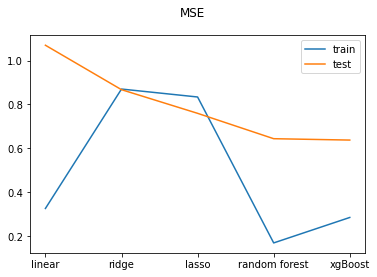

In [33]:
mse_train_errors = [mean_squared_error(linearRegression.predict(X_train), train_data['IMDB Score']), mean_squared_error(ridgeRegression.predict(X_train), train_data['IMDB Score']), mean_squared_error(lassoRegression.predict(X_train), train_data['IMDB Score']), mean_squared_error(RandomForestReg.predict(X_train), train_data['IMDB Score']), mean_squared_error(xgbRegression.predict(X_train), train_data['IMDB Score'])]
mse_test_errors = [mean_squared_error(linearRegression.predict(X_test), test_data['IMDB Score']), mean_squared_error(ridgeRegression.predict(X_test), test_data['IMDB Score']), mean_squared_error(lassoRegression.predict(X_test), test_data['IMDB Score']), mean_squared_error(RandomForestReg.predict(X_test), test_data['IMDB Score']), mean_squared_error(xgbRegression.predict(X_test), test_data['IMDB Score'])]
models = ['linear','ridge', 'lasso', 'random forest', 'xgBoost']

plt.suptitle('MSE')
plt.plot(models, mse_train_errors)
plt.plot(models, mse_test_errors)
plt.legend(labels=['train', 'test'])
plt.show()

# Erorrs of GridSearchCV

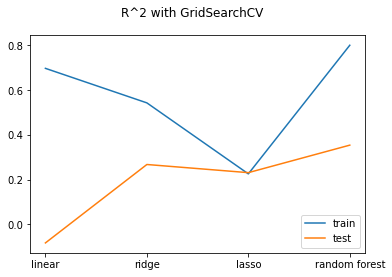

In [38]:
r2_train_errors_grid = [linearRegressionGrid.score(X_train, train_data['IMDB Score']), ridgeRegressionGrid.score(X_train, train_data['IMDB Score']), lassoRegressionGrid.score(X_train, train_data['IMDB Score']), randomForestGrid.score(X_train, train_data['IMDB Score'])]
r2_test_errors_grid = [linearRegressionGrid.score(X_test, test_data['IMDB Score']), ridgeRegressionGrid.score(X_test, test_data['IMDB Score']), lassoRegressionGrid.score(X_test, test_data['IMDB Score']), randomForestGrid.score(X_test, test_data['IMDB Score'])]
models = ['linear','ridge', 'lasso', 'random forest']

plt.suptitle('R^2 with GridSearchCV')
plt.plot(models, r2_train_errors_grid)
plt.plot(models, r2_test_errors_grid)
plt.legend(labels=['train', 'test'])
plt.show()

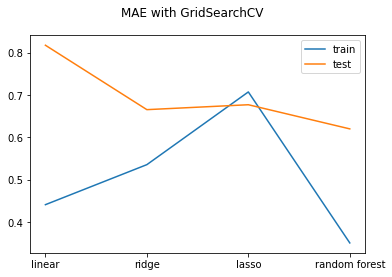

In [36]:
mae_train_errors_grid = [mean_absolute_error(linearRegressionGrid.predict(X_train), train_data['IMDB Score']), mean_absolute_error(ridgeRegressionGrid.predict(X_train), train_data['IMDB Score']), mean_absolute_error(lassoRegressionGrid.predict(X_train), train_data['IMDB Score']), mean_absolute_error(randomForestGrid.predict(X_train), train_data['IMDB Score'])]
mae_test_errors_grid = [mean_absolute_error(linearRegressionGrid.predict(X_test), test_data['IMDB Score']), mean_absolute_error(ridgeRegressionGrid.predict(X_test), test_data['IMDB Score']), mean_absolute_error(lassoRegressionGrid.predict(X_test), test_data['IMDB Score']), mean_absolute_error(randomForestGrid.predict(X_test), test_data['IMDB Score'])]
models = ['linear','ridge', 'lasso', 'random forest']

plt.suptitle('MAE with GridSearchCV')
plt.plot(models, mae_train_errors_grid)
plt.plot(models, mae_test_errors_grid)
plt.legend(labels=['train', 'test'])
plt.show()

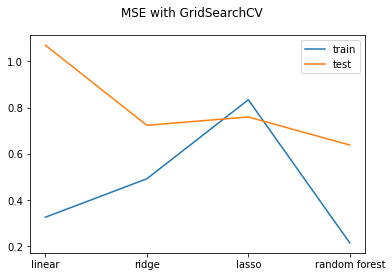

In [35]:
mse_train_errors_grid = [mean_squared_error(linearRegressionGrid.predict(X_train), train_data['IMDB Score']), mean_squared_error(ridgeRegressionGrid.predict(X_train), train_data['IMDB Score']), mean_squared_error(lassoRegressionGrid.predict(X_train), train_data['IMDB Score']), mean_squared_error(randomForestGrid.predict(X_train), train_data['IMDB Score'])]
mse_test_errors_grid = [mean_squared_error(linearRegressionGrid.predict(X_test), test_data['IMDB Score']), mean_squared_error(ridgeRegressionGrid.predict(X_test), test_data['IMDB Score']), mean_squared_error(lassoRegressionGrid.predict(X_test), test_data['IMDB Score']), mean_squared_error(randomForestGrid.predict(X_test), test_data['IMDB Score'])]
models = ['linear','ridge', 'lasso', 'random forest']

plt.suptitle('MSE with GridSearchCV')
plt.plot(models, mse_train_errors_grid)
plt.plot(models, mse_test_errors_grid)
plt.legend(labels=['train', 'test'])
plt.show()